# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [19]:
# Mengumpulkan dan memuat dataset csv
df = pd.read_csv('/content/hasil_clustering.csv')
df.head()

,year,month,country,region,avg_temp_c,precipitation_mm,air_quality_index,uv_index,malaria_cases,dengue_cases,population_density,healthcare_budget,en_country,en_region,air_level,Cluster
0,2000,1,Palestinian Territory,Central,28.132468,152.083870,110.487231,12.000000,53,145,113,1068,8,0,Unhealthy,0
1,2000,2,Palestinian Territory,Central,30.886500,119.591418,83.467928,12.000000,132,48,113,1068,8,0,Moderate,0
2,2000,3,Palestinian Territory,Central,31.366433,95.876124,93.095292,12.000000,34,80,113,1068,8,0,Moderate,0
3,2000,4,Palestinian Territory,Central,28.481870,175.315731,105.530192,9.395894,23,133,113,1068,8,0,Unhealthy,0
4,2000,5,Palestinian Territory,Central,26.890370,191.445990,60.205979,9.935726,39,74,113,1068,8,0,Moderate,0


<ipython-input-20-a18010e0ec21>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='viridis')


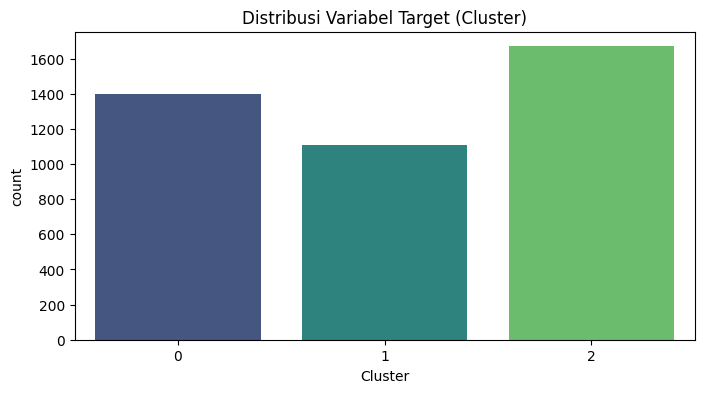

In [20]:
# Visualisasi distribusi variabel target
plt.figure(figsize=(8, 4))
sns.countplot(x='Cluster', data=df, palette='viridis')
plt.title('Distribusi Variabel Target (Cluster)')
plt.show()

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [21]:
# Drop kolom yang tidak diperlukan sebelum pelatihan
df = df.drop(columns=df.select_dtypes(include='object').columns)

# Beberapa kolom tersebut di drop karena beberapa kelas yang bertipe data object merupakan hasil pengelompokkan clustering sebelumnya dan beberapa kelas yang sudah
# di encoding pada program clustering sebelumnya

In [22]:
# Memeriksa tipe data sebelum membagi dataset
print("Jumlah Baris dan Kolom :", df.shape)
print("\nTipe Data :\n", df.dtypes)

Jumlah Baris dan Kolom : (4174, 13)

Tipe Data :
 year                    int64
month                   int64
avg_temp_c            float64
precipitation_mm      float64
air_quality_index     float64
uv_index              float64
malaria_cases           int64
dengue_cases            int64
population_density      int64
healthcare_budget       int64
en_country              int64
en_region               int64
Cluster                 int64
dtype: object


In [23]:
# Membagi dataset
# Buat instance MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['Cluster'])  # Asumsikan 'Cluster' sebagai target klasifikasi
y = df['Cluster'].round().astype(int)

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(3339, 12), y_train=(3339,)
Test set shape: X_test=(835, 12), y_test=(835,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [24]:
# Pelatihan model klasifikasi dengan beberapa aglgoritma
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [25]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    return results

In [35]:
# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

In [36]:
# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

In [37]:
# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

In [38]:
# Konversi ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)

                       Model  Accuracy  Precision    Recall  F1-Score
0  K-Nearest Neighbors (KNN)  0.998802   0.996825  1.000000  0.998410
1           Naive Bayes (NB)  0.953293   1.000000  0.875796  0.933786


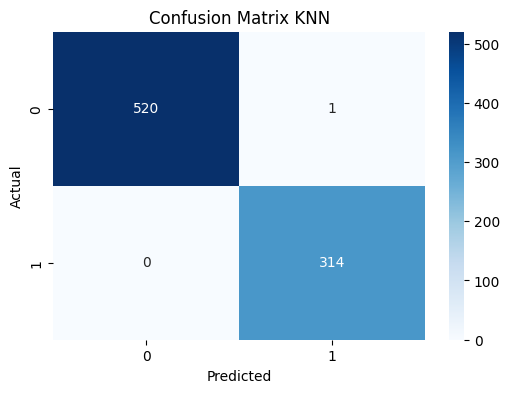

In [41]:
# Confusion matrix KNN
y_pred = knn.predict(X_test)

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix KNN')
plt.show()

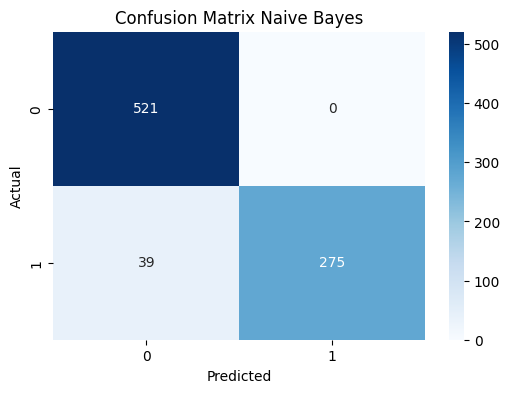

In [40]:
# Confusion matrix Naive Bayes
y_pred = nb.predict(X_test)

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Naive Bayes')
plt.show()

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

## Analisis Hasil Evaluasi Model Klasifikasi

Dari tabel hasil evaluasi, terlihat bahwa empat model yaitu K-Nearest Neighbors (KNN), Decision Tree (DT), Random Forest (RF), dan Support Vector Machine (SVM) pada semua metriks evaluasi adalah :
- **Accuracy:** 100 %  
- **Precision:** 100 %
- **Recall:** 100 %
- **F1-Score:** 100 %  



## **Analisis Hasil Evaluasi Model Klasifikasi**

1. **K-Nearest Neighbors (KNN)**  
   Model ini menunjukkan performa lebih baik dengan **akurasi 99.88%**, **precision 99.68%**, **recall 100%**, dan **F1-score 99.84%**. Dengan recall yang sempurna, model ini mampu menangkap seluruh instance positif dengan sangat baik. Precision yang tinggi juga menandakan model jarang melakukan kesalahan.

2. **Naive Bayes (NB)**  
   Naive Bayes memiliki **akurasi 95.33%**, **precision 100%**, **recall 87.58%**, dan **F1-score 93.38%**. Model ini sangat tepat dalam memprediksi kelas positif (precision 100%), namun masih ada beberapa kasus positif yang gagal dikenali, terlihat dari recall yang sedikit lebih rendah dibanding KNN. Meski begitu, F1-score menunjukkan performa keseluruhan yang tetap bagus.


### **Kesimpulan:**

Dari dua model yang dibandingkan, **KNN lebih unggul dibandingkan dengan Naive Bayes ** dengan keseimbangan antara ketepatan dan cakupan prediksi, menjadikannya **model terbaik dalam percobaan hasil clustering sebelumnya**. Naive Bayes masih layak dipertimbangkan sebagai alternatif yang ringan dan cepat, terutama saat resources terbatas.